In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

action_recognition.h5  Data/  static/  templates/  uploads/


In [ ]:
# Importing the necessary libraries
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#add preprocessing layer to the front of Resnet50
image_size=[64,64]
resnet=ResNet50(input_shape= image_size+[3], weights='imagenet', include_top=False)
#input_shape -> (64,64) + rgb(3)
#include_top -> it is telling whether the last layer needs to be added or not
# include_top=TRUE -> it will adde
# include_top=FALSE -> it will remove

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Making weights as zero or false
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
# tranfer learning layers already have some weights we shoud not excute in our project.
# we shoud make it zero or false
for layer in resnet.layers:
  layer.trainable=False

#trainable helps to train the layers or not

In [ ]:
# Adding flatten layer
x=Flatten()(resnet.output)

In [ ]:
# Adding Dense Layer
prediction=Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# Loading the dataset
xtrain=train_datagen.flow_from_directory('Data/trainset', target_size=(64,64), batch_size=32, class_mode='categorical')
xtest=test_datagen.flow_from_directory('Data/testset', target_size=(64,64), batch_size=32, class_mode='categorical')

Found 689 images belonging to 3 classes.
Found 115 images belonging to 3 classes.


In [ ]:
xtrain.class_indices

{'playing cricket': 0, 'sitting': 1, 'standing': 2}

In [ ]:
# Training the model
r=model.fit_generator(xtrain, epochs=50, validation_data=xtest, validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
22/22 [==============================] - 247s 11s/step - loss: 1.0866 - accuracy: 0.3854 - val_loss: 1.0501 - val_accuracy: 0.3913
Epoch 2/50
22/22 [==============================] - 33s 1s/step - loss: 0.8801 - accuracy: 0.6001 - val_loss: 0.9928 - val_accuracy: 0.5217
Epoch 3/50
22/22 [==============================] - 33s 1s/step - loss: 0.8136 - accuracy: 0.6163 - val_loss: 0.9766 - val_accuracy: 0.5130
Epoch 4/50
22/22 [==============================] - 32s 1s/step - loss: 0.7730 - accuracy: 0.6437 - val_loss: 0.9991 - val_accuracy: 0.5304
Epoch 5/50
22/22 [==============================] - 33s 1s/step - loss: 0.7501 - accuracy: 0.6673 - val_loss: 0.9974 - val_accuracy: 0.5304
Epoch 6/50
22/22 [==============================] - 33s 1s/step - loss: 0.7113 - accuracy: 0.6807 - val_loss: 0.9819 - val_accuracy: 0.5391
Epoch 7/50
22/22 [==============================] - 32s 1s/step - loss: 0.6799 - accuracy: 0.6984 - val_loss: 0.9389 - val_accuracy: 0.5913
Epoch 8/50
22/22 [

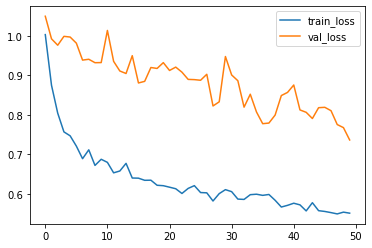

In [ ]:
#loss performance
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

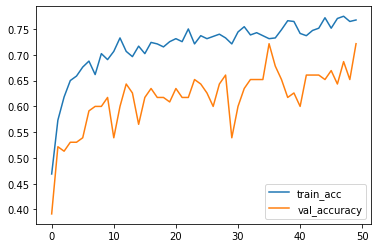

In [ ]:
#accuracy performance
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# saving the model
from tensorflow.keras.models import load_model
model.save('action_recognition.h5')